In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

In [112]:
train=pd.read_csv("bike-sharing-demand/train.csv", parse_dates=["datetime"])
test=pd.read_csv("bike-sharing-demand/test.csv", parse_dates=["datetime"])
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


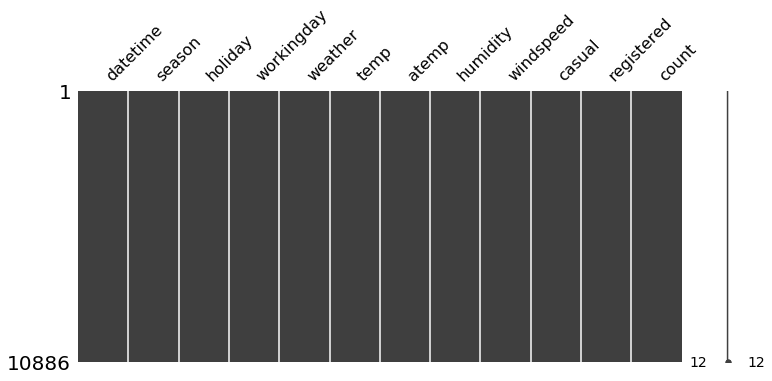

In [113]:
train.describe()
train.temp.describe()
train.isnull().sum()
import missingno as msno
msno.matrix(train, figsize=(12,5))

In [114]:
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second
train['dayofweek']=train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [115]:
test['year']=test['datetime'].dt.year
test['month']=test['datetime'].dt.month
test['day']=test['datetime'].dt.day
test['hour']=test['datetime'].dt.hour
test['minute']=test['datetime'].dt.minute
test['second']=test['datetime'].dt.second
test['dayofweek']=test['datetime'].dt.dayofweek
test.shape


(6493, 16)

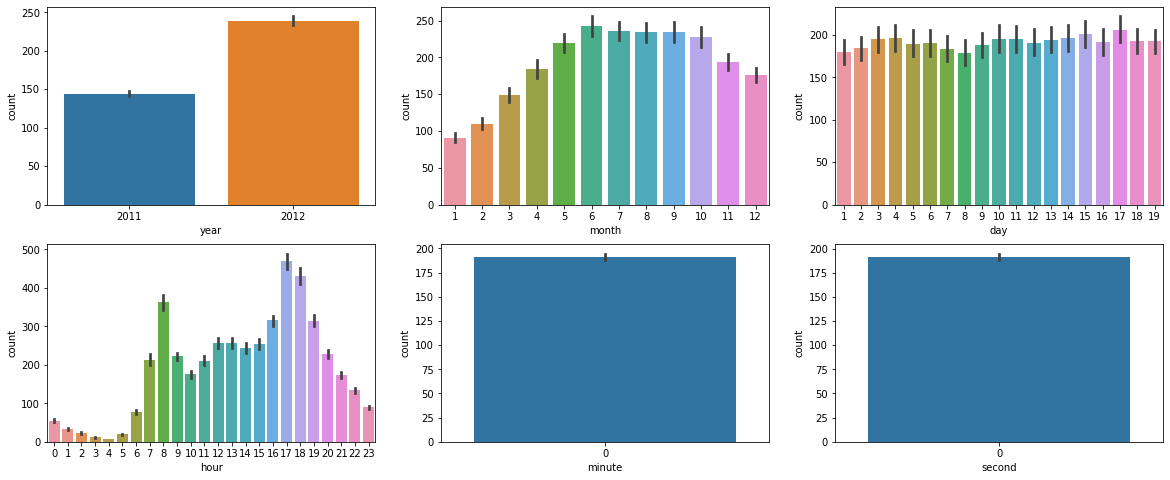

In [116]:
fig,((ax1, ax2, ax3),(ax4, ax5, ax6))=plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(20,8)
sns.barplot(data=train,x="year",y="count", ax=ax1)
sns.barplot(data=train,x="month",y="count", ax=ax2)
sns.barplot(data=train,x="day",y="count", ax=ax3)
sns.barplot(data=train,x="hour",y="count", ax=ax4)
sns.barplot(data=train,x="minute",y="count", ax=ax5)
sns.barplot(data=train,x="second",y="count", ax=ax6)

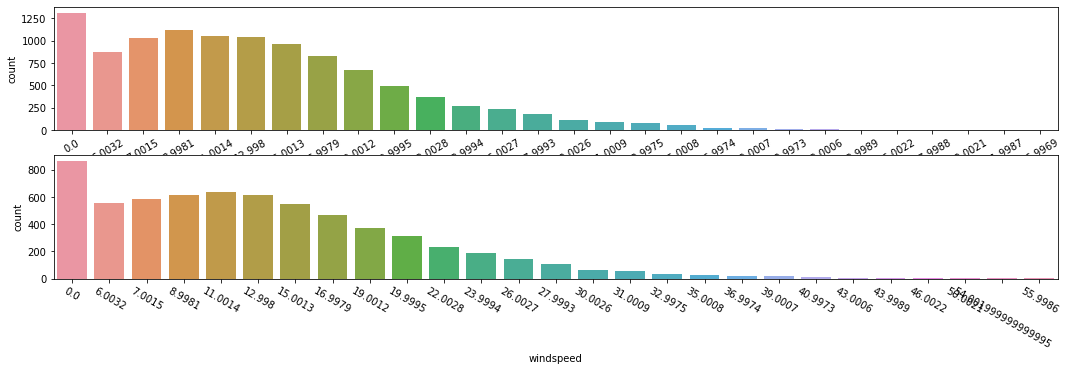

In [117]:
fig,axes = plt.subplots(nrows=2)
fig.set_size_inches(18,5)
plt.sca(axes[0]) # set current axis 현재 축을 설정
plt.xticks(rotation=30)
sns.countplot(data=train, x='windspeed',ax=axes[0])

plt.sca(axes[1]) # set current axis 현재 축을 설정
plt.xticks(rotation=-30)
sns.countplot(data=test, x='windspeed',ax=axes[1])

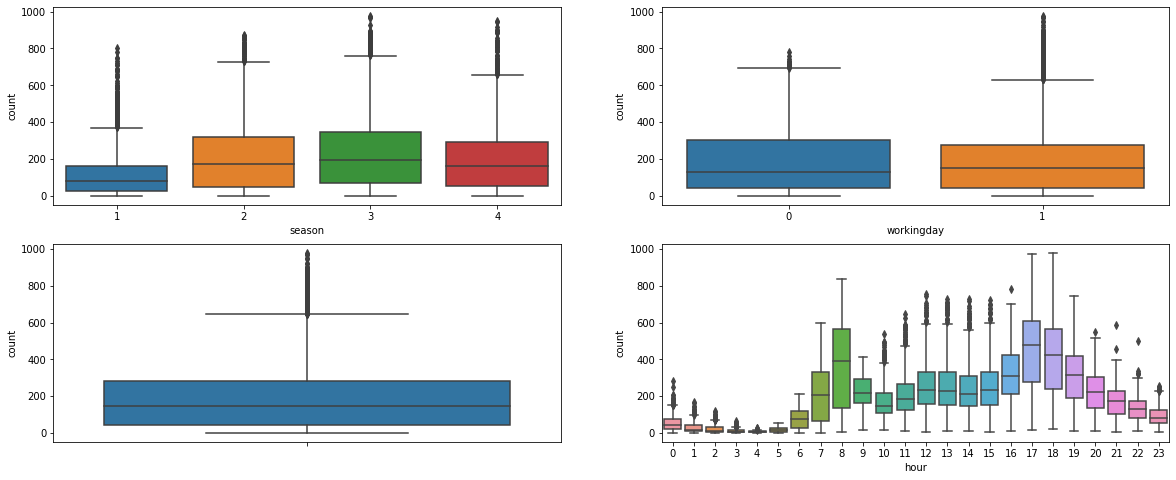

In [118]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,8)
sns.boxplot(data=train, x="season", y="count", ax=axes[0][0])
sns.boxplot(data=train, x="workingday", y="count", ax=axes[0][1])
sns.boxplot(data=train, orient="v", y="count", ax=axes[1][0])
sns.boxplot(data=train, x="hour", y="count", ax=axes[1][1])

In [119]:
train['dayofweek']=train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [120]:
train['dayofweek'].unique()
# 5 1500
# ...
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

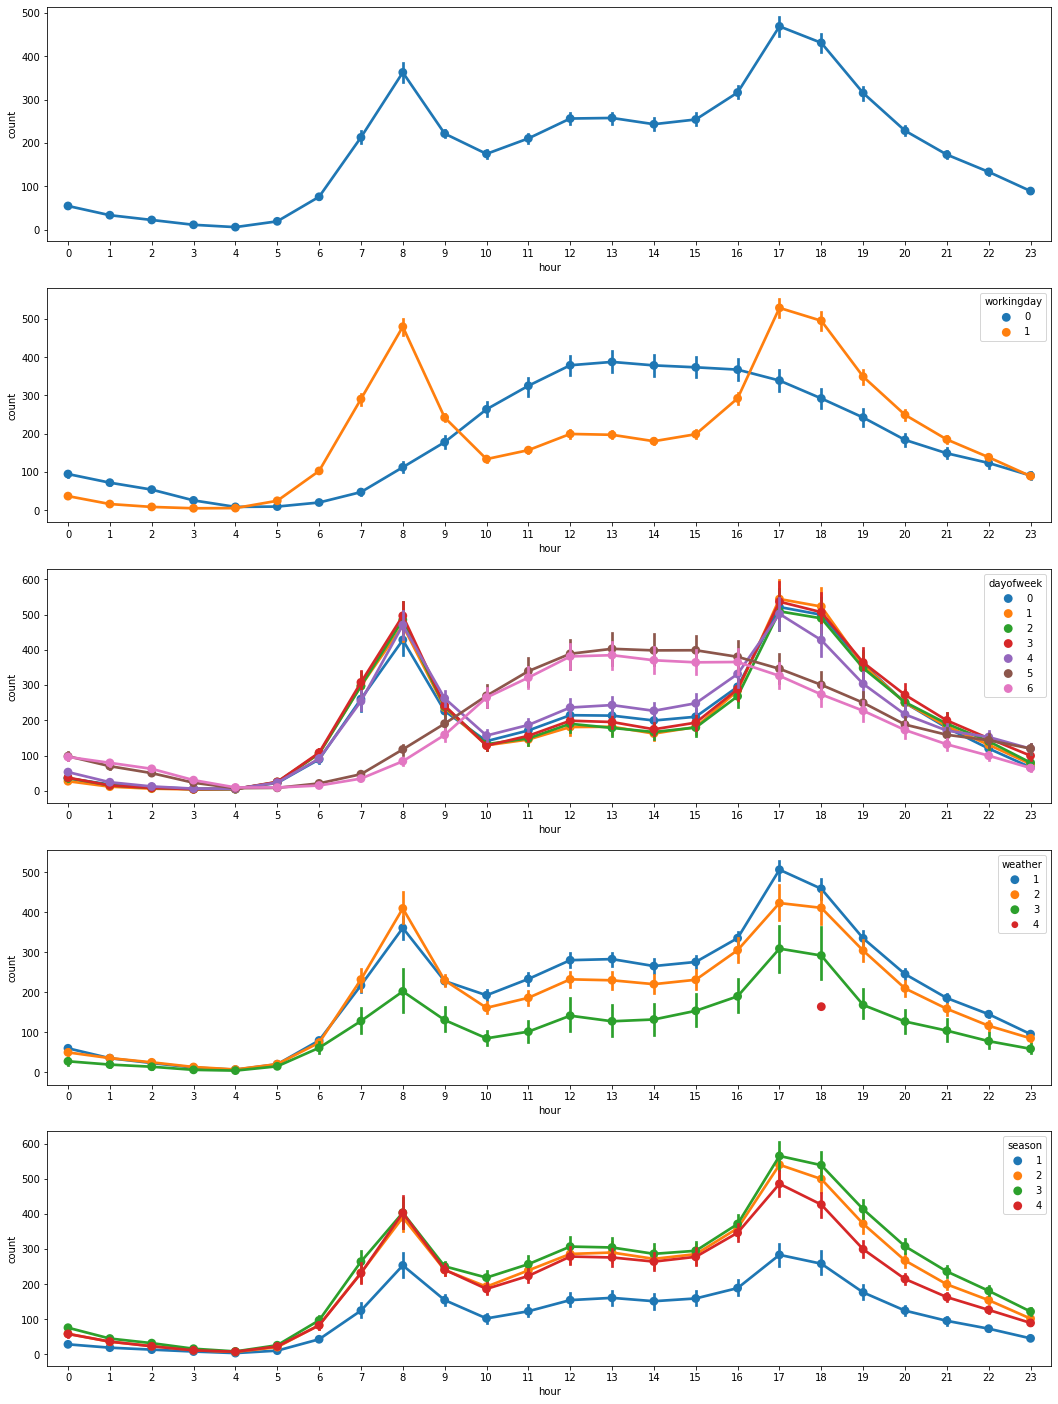

In [121]:
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=5)
fig.set_size_inches(18,25)
sns.pointplot(data=train,x="hour",y="count",ax=ax1)
sns.pointplot(data=train,x="hour",y="count",hue="workingday",ax=ax2)
sns.pointplot(data=train,x="hour",y="count",hue="dayofweek",ax=ax3)
sns.pointplot(data=train,x="hour",y="count",hue="weather",ax=ax4)
sns.pointplot(data=train,x="hour",y="count",hue="season",ax=ax5)

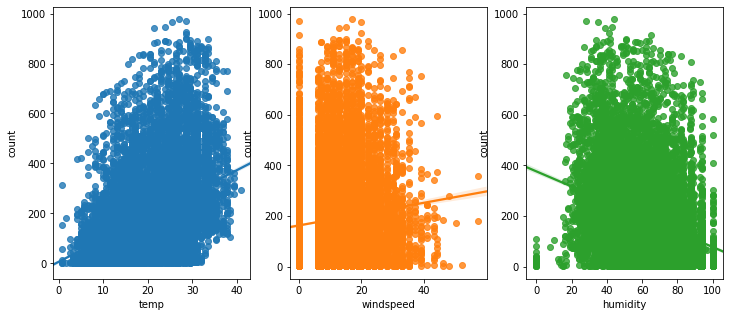

In [122]:
fig,(ax1,ax2,ax3)=plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sns.regplot(x="temp",y="count", data=train, ax=ax1)
sns.regplot(x="windspeed",y="count", data=train, ax=ax2)
sns.regplot(x="humidity",y="count", data=train, ax=ax3)

In [123]:
#train['year_month']=train['datetime']
#2011-1="2011-01-01 00:00:00"
def ym(mydt):    
    return "{0}-{1}".format(mydt.year, mydt.month)

train['year_month']=train['datetime'].apply(ym)
train[['datetime','year_month']]
#.year
#.month


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1
...,...,...
10881,2012-12-19 19:00:00,2012-12
10882,2012-12-19 20:00:00,2012-12
10883,2012-12-19 21:00:00,2012-12
10884,2012-12-19 22:00:00,2012-12


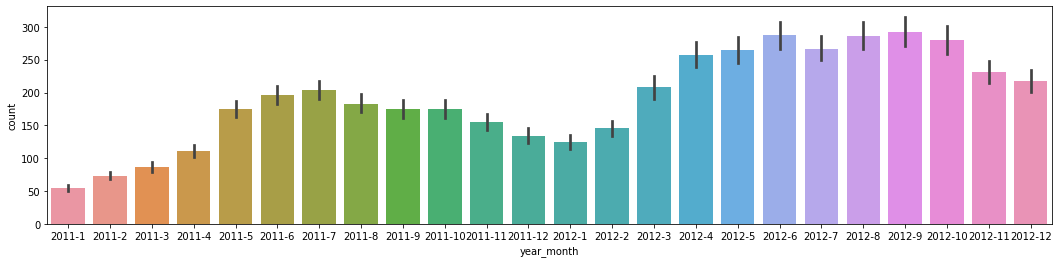

In [124]:
fig,axes=plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,4)
sns.barplot(data=train, x="year_month", 
            y="count", ax=axes)

In [125]:
import numpy as np
#이상치(outliers) 제거

trainWithoutOutliers=train[np.abs(train["count"]-train["count"].mean())<= (train['count'].std()*3)]
#표준편차*3
print(train.shape)
print(trainWithoutOutliers.shape)



(10886, 20)
(10739, 20)


In [126]:
#train 풍속=0
#train['windspeed'].mean()

#train.loc[train['windspeed']==0, 'windspeed']=train['windspeed'].mean()
#train.loc[train['windspeed']!=0, 'windspeed']

#풍속이 0인것과 아닌것을 구분하여 저장

trainWind0=train.loc[train['windspeed']==0]
trainWindNot0=train.loc[train['windspeed']!=0]
print(trainWind0.shape)
print(trainWindNot0.shape)

(1313, 20)
(9573, 20)


In [127]:
trainWind0.shape
trainWindNot0.shape

(9573, 20)

In [128]:
#머신러닝 랜덤포레스트로 풍속 예측
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    #data의 windspeed값이 0인 데이터를
    #rf를 이용하여 예측한 값으로 대체
    
    #풍속 예측에 사용되는 변수
    wCol=['season', 'weather', 'humidity',
          'month', 'temp','year','atemp']    
    
    #풍속을 0인것과 아닌것으로 구분
    dataWind0=data.loc[data['windspeed']==0]
    dataWindNot0=data.loc[data['windspeed']!=0]
        
    #랜덤포레스트 분류기 생성
    rfModel=RandomForestClassifier()
    dataWindNot0['windspeed']=dataWindNot0['windspeed'].astype("str")
    # wCol -> 풍속 학습 -> 모델 완성
    rfModel.fit(dataWindNot0[wCol],dataWindNot0['windspeed'])
    
    #학습한 모델로 풍속 0에 대한 데이터 예측
    preValue=rfModel.predict(X=dataWind0[wCol])
    print(preValue)
    
    predictWind0=dataWind0
    predictWindNot0=dataWindNot0
    
    predictWind0['windspeed']=preValue
    
    data=predictWindNot0.append(predictWind0)
    data.sort_index(inplace=True)
    return data

train = predict_windspeed(train)
test = predict_windspeed(test)
test_predicted

['6.0032' '6.0032' '6.0032' ... '8.9981' '12.998' '11.0014']
['11.0014' '11.0014' '8.9981' '7.0015' '12.998' '12.998' '6.0032' '6.0032'
 '6.0032' '7.0015' '11.0014' '8.9981' '8.9981' '8.9981' '7.0015' '6.0032'
 '6.0032' '6.0032' '6.0032' '6.0032' '6.0032' '6.0032' '6.0032' '6.0032'
 '6.0032' '7.0015' '7.0015' '7.0015' '6.0032' '7.0015' '7.0015' '6.0032'
 '12.998' '8.9981' '11.0014' '8.9981' '7.0015' '6.0032' '7.0015' '6.0032'
 '7.0015' '7.0015' '7.0015' '6.0032' '7.0015' '7.0015' '6.0032' '6.0032'
 '6.0032' '6.0032' '6.0032' '6.0032' '7.0015' '7.0015' '23.9994' '6.0032'
 '6.0032' '12.998' '12.998' '12.998' '15.0013' '12.998' '12.998' '7.0015'
 '7.0015' '7.0015' '7.0015' '7.0015' '11.0014' '11.0014' '11.0014'
 '11.0014' '7.0015' '7.0015' '11.0014' '6.0032' '7.0015' '7.0015' '6.0032'
 '6.0032' '15.0013' '15.0013' '8.9981' '7.0015' '11.0014' '26.0027'
 '16.9979' '7.0015' '7.0015' '7.0015' '7.0015' '7.0015' '7.0015' '6.0032'
 '6.0032' '19.0012' '16.9979' '16.9979' '6.0032' '8.9981' '11.001

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,11.0014,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,11.0014,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,19,0,0,0
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,20,0,0,0
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31,21,0,0,0
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31,22,0,0,0


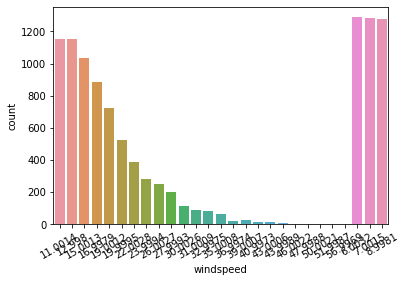

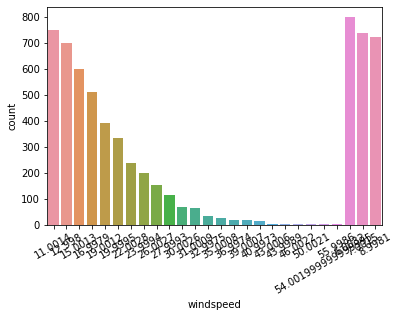

In [129]:
plt.subplot()
fig.set_size_inches(30,8)
plt.xticks(rotation = 30)
sns.countplot(data=train, x='windspeed')
plt.show()

plt.subplot()
fig.set_size_inches(30,8)
plt.xticks(rotation = 30)
sns.countplot(data=test, x='windspeed')
plt.show()


In [130]:
# feature selection
# 연속형(temp, humidity, wind, atemp 등), 범주형(dayofweek, season 등)
# 범주형 변수는 type을 category로 변경
print(train['season'].head()) # int 값이면 나중에 모델 생성에 오류 발생
train['season'] = train['season'].astype("category")
test['season'] = test['season'].astype("category")
print(train['season'].head()) ## Datatype이 카테고리화 되어짐

0    1
1    1
2    1
3    1
4    1
Name: season, dtype: int64
0    1
1    1
2    1
3    1
4    1
Name: season, dtype: category
Categories (4, int64): [1, 2, 3, 4]


In [131]:
feature_names = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'hour', 'dayofweek']
c_f_n = ['season', 'holiday', 'workingday', 'weather', 'month', 'year', 'hour', 'dayofweek']

for v in c_f_n:
    train[v] = train[v].astype('category')
    test[v] = test[v].astype('category')    

In [132]:
xtrain=train[feature_names]
print(xtrain.shape)
xtest=test[feature_names]
xtest.shape

(10886, 11)


(6493, 11)

In [133]:
ytrain = train['count'] # 레이블(정답)
ytrain.shape

(10886,)

In [134]:
def rmsle(predicted_value,actual_value):
    # 넘파이 배열로의 변환
    predicted_value = np.array(predicted_value)
    actual_value = np.array(actual_value)
    
    log_predict = np.log(predicted_value+1)
    log_actual = np.log(actual_value+1)
    diff = np.square(log_predict-log_actual) # diff ** 2 가 메모리적으로 좋다.
    mean_diff = diff.mean()
    score = np.sqrt(mean_diff)
    return score

In [137]:
# k-fold cross_validation 핸즈온 머신러닝 p.127
'''
data: 400개
1 2 3 4 : 4개의 폴드
1 2 3 : train, 4 : test => 모델 평가(80%)
1 2 4 : train, 3 : test => 모델 평가(70%)
1 3 4 : train, 2 : test => 모델 평가(80%)
2 3 4 : train, 1 : test => 모델 평가(70%)
==>> 4-fold cross_validation 
=> 순차적으로 1 2 3 4 뽑아도되고 아니면 랜덤해서 뽑아도됨

훈련데이터와 테스트데이터를 4개로 분할해서 애들간은 평균을 가지고 평균을 낸다.
정확하게 모델을 평가하기 위해 하는 것

validation 과정이라고 할수 있다.
'''
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

kfold=KFold(n_splits=10,shuffle=True, random_state=42)
# n_split : kfold 의 k 값이 10  : 10개의 폴드가 만들어짐
model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state =42)
# n_estimators
# n_jobs : core의 갯수는 몇개로 할 것인가 -1로 놓으면 현재 시스템의 최적의 core 수로 하는 것으로 설정
# random_state : 랜덤 난수를 동일하게 놓기위함, 그래야 나중에 model 수정했을 때, 모델들 간의 비교를 할 수 있다.



In [140]:
from sklearn.metrics import make_scorer
rmsle_score = make_scorer(rmsle)


%time score = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring=rmsle_score)
print(score.mean())

Wall time: 11.8 s
0.3307020378416182


In [150]:
model.fit(xtrain, ytrain)
prediction = model.predict(xtest)
prediction

array([ 11.3       ,   4.68      ,   4.21      , ..., 100.42166667,
        99.362     ,  47.59      ])

In [151]:
submission=pd.read_csv("bike-sharing-demand/sampleSubmission.csv")
submission['count'] = prediction
submission.to_csv("bike-sharing-demand/result.csv", index=False)